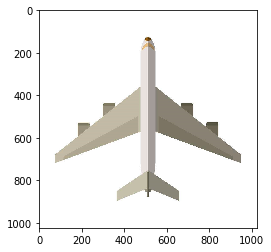

In [140]:
import cv2
#matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread('datas/plane2.jpg')
rows,cols,_ = src.shape
plt.imshow(src)

In [141]:
blured = cv2.blur(src,(5,5)) # 进行低通滤波，去掉噪声
mask = np.zeros((rows + 2,cols + 2),np.uint8)
dst = np.zeros_like(src)
dst[:,:] = 255


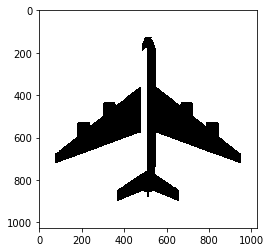

In [142]:
# 填充
cv2.floodFill(blured, mask, (cols-1,rows-1), (255,255,255), (2,2,2),(3,3,3),8)
plt.imshow(mask,cmap = plt.cm.gray)

In [143]:
gray = cv2.cvtColor(blured,cv2.COLOR_BGR2GRAY)

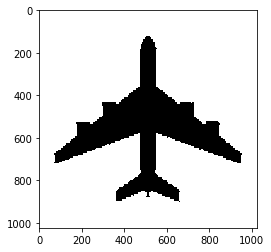

In [144]:
# 定义结构元素
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5))
opened = cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel)
closed = cv2.morphologyEx(opened,cv2.MORPH_CLOSE,kernel)
plt.imshow(closed,cmap = plt.cm.gray)

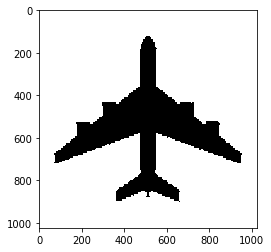

In [145]:
# 查找轮廓
_,binary = cv2.threshold(closed,240,255,cv2.THRESH_BINARY)
plt.imshow(binary,cmap = plt.cm.gray)

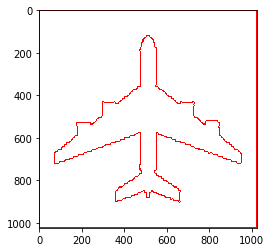

In [147]:
_,contours,hierachy = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# print(len(contours))
# print(contours)
cv2.drawContours(dst,contours,-1,(255,0,0),3)
plt.imshow(dst)